In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [140]:
SMI_tie_points = pd.read_csv('Chandler_data/d18O_SMI_tie_points.csv')
SMI_tie_points['Date'] = pd.to_datetime(SMI_tie_points['Date'])
SMI_tie_depth = SMI_tie_points['Depth_point']
SMI_tie_d18O = SMI_tie_points['d18O']
SMI_tie_time = SMI_tie_points['Date']
SMI_depth_df = pd.read_csv('Chandler_data/SMI_d18O.csv')
SMI_depth = SMI_depth_df['mm']
SMI_d18O = SMI_depth_df['d18O']

In [141]:
SMII_tie_points = pd.read_csv('Chandler_data/d18O_SMII_tie_points.csv')
SMII_tie_points['Date'] = pd.to_datetime(SMII_tie_points['Date'])
SMII_tie_depth = SMII_tie_points['Depth_point']
SMII_tie_d18O = SMII_tie_points['d18O']
SMII_tie_time = SMII_tie_points['Date']
SMII_depth_df = pd.read_csv('Chandler_data/SMII_d18O.csv')
SMII_depth = SMII_depth_df['mm']
SMII_d18O = SMII_depth_df['d18O']

In [142]:
def interpolate_depth_time(tie_time, depth, data, tie_depth):
    # Create interpolation function for depth to time
    tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds
    f_rel = interp1d(tie_depth, tie_time_ns, kind='linear', fill_value='extrapolate', assume_sorted=False)
    times_ns = f_rel(depth)                          # numeric nanoseconds for each measurement depth
    times = pd.to_datetime(times_ns)

    # Create a new time index with even spacing (1 month intervals)
    monthly_step = pd.DateOffset(months=1)
    even_time_segments = []
    for i in range(len(tie_time) - 1):
        t0, t1 = tie_time[i], tie_time[i+1]
        # build a date range with 1-month steps
        seg = pd.date_range(start=t0, end=t1, freq=monthly_step)
        # drop last point except for final interval
        if i < len(tie_time) - 2:
            seg = seg[:-1]
        even_time_segments.append(seg)
    even_time = pd.DatetimeIndex(np.concatenate(even_time_segments))

    even_time_ns = even_time.view('int64')  # numeric x-axis
    g = interp1d(times_ns, data, kind='linear', fill_value='extrapolate', assume_sorted=False)
    even_data = g(even_time_ns)

    months = even_time.month  # 1 - 12
    # climatology by month (ignores NaN by default in pandas)
    clim = pd.Series(even_data).groupby(months).mean()
    even_data_anom = even_data - clim[months].to_numpy()

    return even_data_anom, even_time

def visualize(times, data, title):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(times, data, '-o')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{title} Anomaly (‰)')
    ax.set_title(f'{title} (monthly, deseasonalized)')
    ax.grid(True)
    ax.invert_yaxis()  # Invert the y-axis for d18O convention
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3515681422.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds


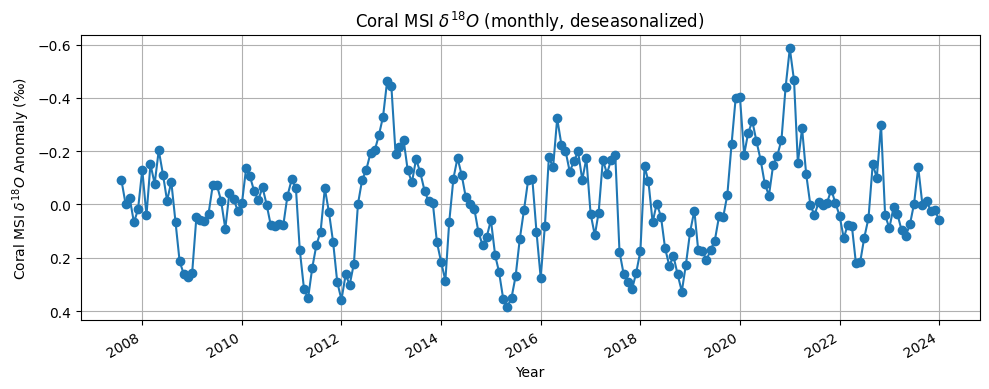

In [143]:
even_SMI_d18O_anom, SMI_even_time = interpolate_depth_time(SMI_tie_time, SMI_depth, SMI_d18O, SMI_tie_depth)
visualize(SMI_even_time, even_SMI_d18O_anom, 'Coral MSI $\delta^{18}O$')

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3515681422.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds


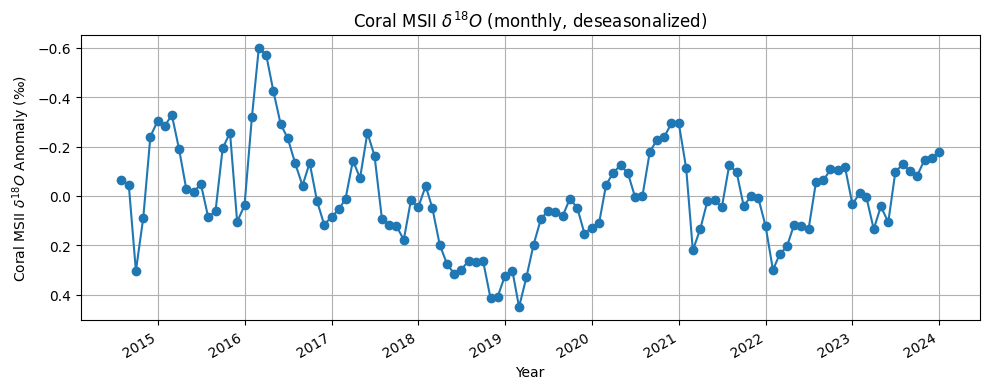

In [144]:
even_SMII_d18O_anom, SMII_even_time = interpolate_depth_time(SMII_tie_time, SMII_depth, SMII_d18O, SMII_tie_depth)
visualize(SMII_even_time, even_SMII_d18O_anom, 'Coral MSII $\delta^{18}O$')

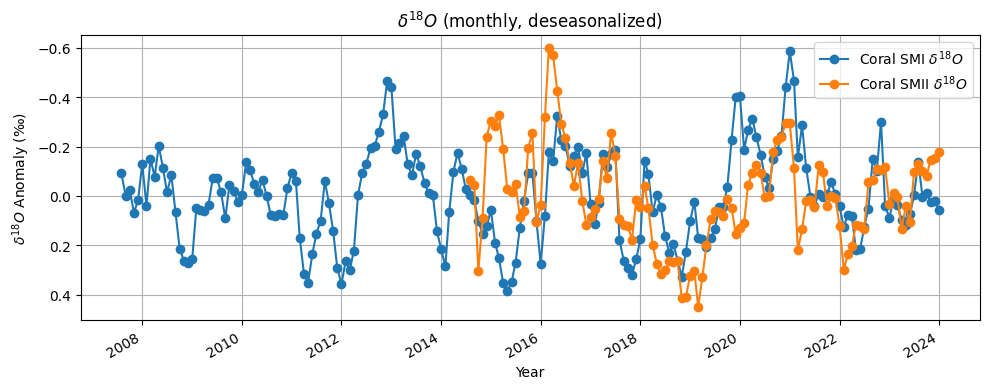

In [145]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(SMI_even_time, even_SMI_d18O_anom, '-o')
ax.plot(SMII_even_time, even_SMII_d18O_anom, '-o')
ax.set_xlabel('Year')
ax.set_ylabel(r'$\delta^{18}O$ Anomaly (‰)')
ax.set_title(r'$\delta^{18}O$ (monthly, deseasonalized)')
ax.grid(True)
ax.invert_yaxis()  # Invert the y-axis for d18O convention
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(['Coral SMI $\delta^{18}O$', 'Coral SMII $\delta^{18}O$'])
plt.show()

In [150]:
SMI_tie_points = pd.read_csv('Chandler_data/SrCa_SMI_tie_points.csv')
SMI_tie_points['Date'] = pd.to_datetime(SMI_tie_points['Date'])
SMI_tie_depth = SMI_tie_points['Depth_point']
SMI_tie_SrCa = SMI_tie_points['SrCa']
SMI_tie_time = SMI_tie_points['Date']
SMI_depth_df = pd.read_csv('Chandler_data/SMI_SrCa_with_depth.csv')
SMI_depth = SMI_depth_df['mm']
SMI_SrCa = SMI_depth_df['SrCa']

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3515681422.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  tie_time_ns = tie_time.view('int64').to_numpy()  # int64 nanoseconds


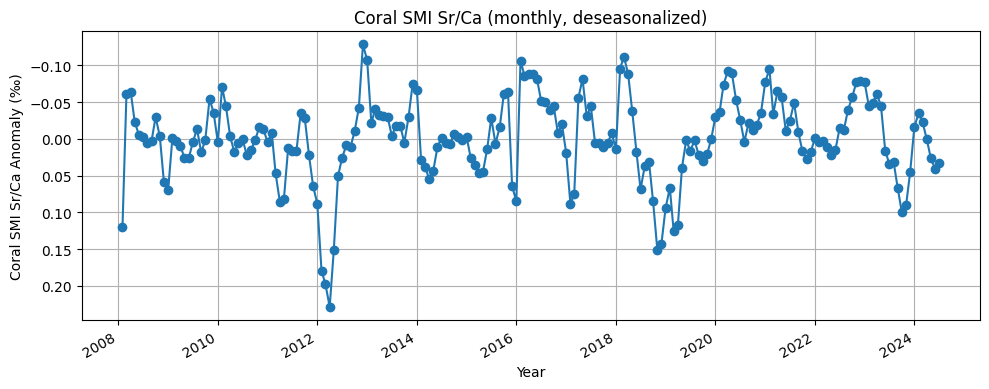

In [151]:
even_SMI_SrCa_anom, SMI_even_time = interpolate_depth_time(SMI_tie_time, SMI_depth, SMI_SrCa, SMI_tie_depth)
visualize(SMI_even_time, even_SMI_SrCa_anom, 'Coral SMI Sr/Ca')

In [152]:
sst_df = pd.read_csv('Chandler_data/sst_data_year.csv')
sst_df['Date'] = pd.to_datetime(sst_df['Date'])
sss_df = pd.read_csv('Chandler_data/SSS_2010_2024.csv')
sss_df['Date'] = pd.to_datetime(sss_df['datetime'])

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3777388346.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sst_df['Date'] = pd.to_datetime(sst_df['Date'])
/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_44154/3777388346.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sss_df['Date'] = pd.to_datetime(sss_df['datetime'])


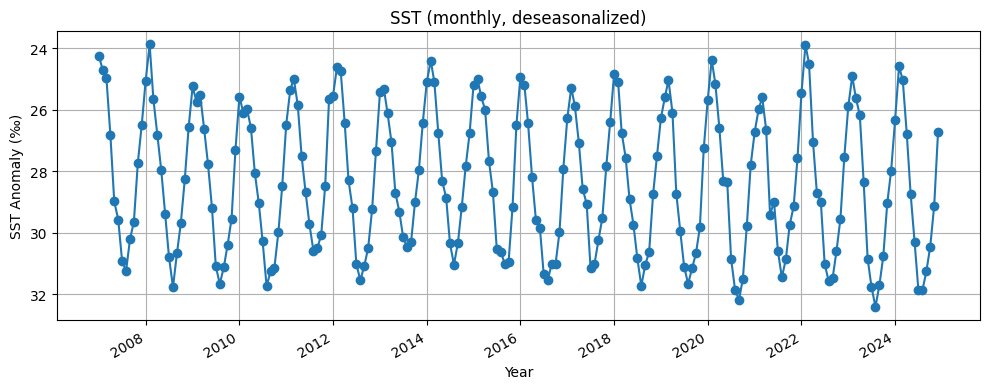

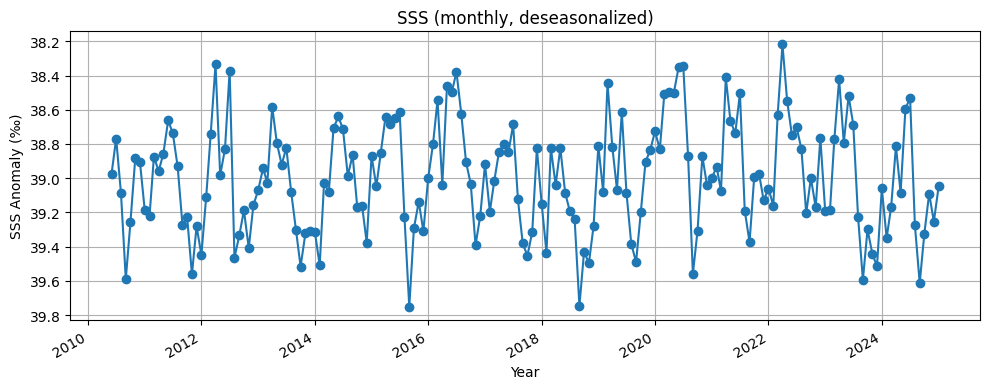

In [156]:
visualize(sst_df['Date'], sst_df['SST'], 'SST')
visualize(sss_df['Date'], sss_df['sss'], 'SSS')